In [ ]:
# Task: Cluster the credit card users into different groups to find any meaningful patterns. Use
# Principal Component Analysis (PCA) to reduce the dimension of the feature space and then
# use the K-means algorithm to find clusters. Import relevant Python libraries.
# • Load dataset (CC GENERAL.csv, the name of the file when downloaded from Kaggle.) 
# • Check for null values and handle those values.
# • Perform feature scaling using StandardScaler.
# • Perform PCA with all the columns and plot number of components vs. PCA cumulative explained variance. From the plot, identify the number of components required to cover 85% of the variance.
# • Perform PCA with 2 principal components with the aim of visualizing clustering.
# • Find the 2 columns which give the most covariances. 
# • Interpret the results of PCA by looking at the covariance matrix (use get_covariance() method of PCA).
# • Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters (Elbow Method). From the elbow plot, identify the ideal required number of clusters.
# • Perform K Means Clustering on the 2 component PCA transformed data with the ideal number of clusters found in the sixth bullet point.
# • Visualize the clusters on a scatter plot between 1st PCA and 2nd PCA component giving different colors to each cluster.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
dataset = pd.read_csv('data\cc-general.csv')
dataset.sample(10)
dataset.shape
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Check for missing values
print(dataset.isnull().sum())

# Drop the 'CUST_ID' column as it is not relevant for clustering
dataset = dataset.drop('CUST_ID', axis=1)

# Fill missing values with the mean of the respective columns
dataset.fillna(dataset.mean(), inplace=True)

# Verify that there are no null values left
print("\nNull values after handling:")
print(dataset.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Null values after handling:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Convert the scaled data back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=dataset.columns)

# Display the first few rows of the scaled dataset
print(scaled_df.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451      

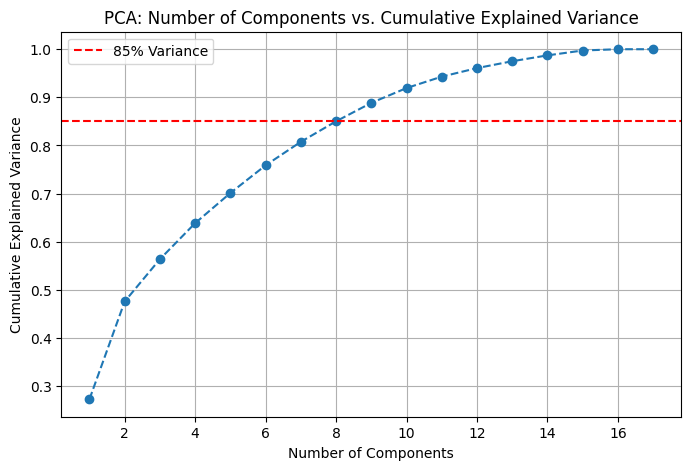

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Number of Components vs. Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Variance')
plt.legend()
plt.grid()
plt.show()


       PCA1      PCA2
0 -1.682220 -1.076451
1 -1.138295  2.506477
2  0.969684 -0.383520
3 -0.873628  0.043166
4 -1.599434 -0.688581


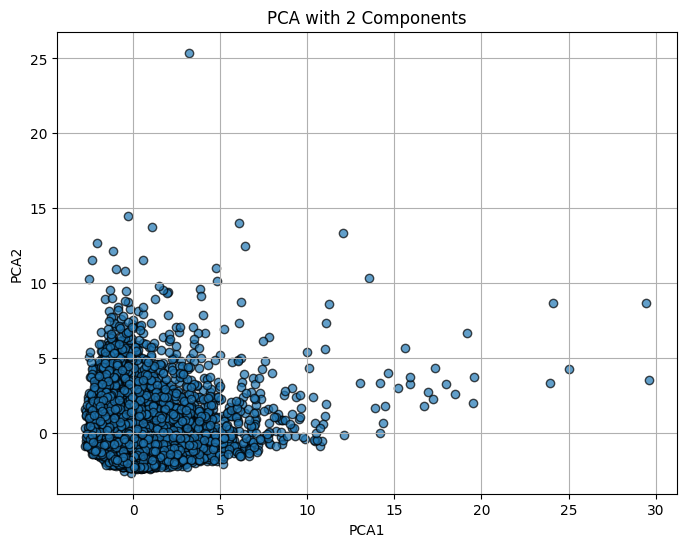

In [8]:
# Perform PCA with 2 components
pca_2 = PCA(n_components=2)
pca_data_2d = pca_2.fit_transform(scaled_data)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(data=pca_data_2d, columns=['PCA1', 'PCA2'])

# Display the first few rows of the PCA-transformed data
print(pca_df.head())

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.7, edgecolor='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA with 2 Components')
plt.grid()
plt.show()

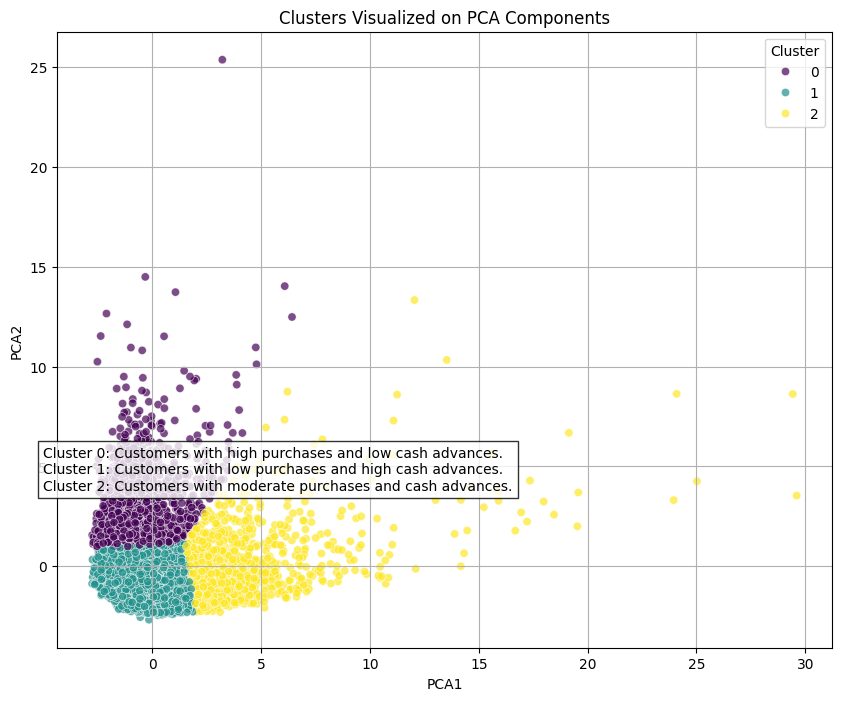

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data_2d)
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Clusters Visualized on PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()

# Add explanation as a text box
explanation = (
    "Cluster 0: Customers with high purchases and low cash advances.\n"
    "Cluster 1: Customers with low purchases and high cash advances.\n"
    "Cluster 2: Customers with moderate purchases and cash advances."
)
plt.text(
    x=-5, y=6,  # Adjust the x and y coordinates based on your graph
    s=explanation,
    fontsize=10,
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()


In [11]:
# Add the cluster labels to the original dataset
dataset['Cluster'] = kmeans.labels_

# Analyze the mean values of each feature for each cluster
cluster_summary = dataset.groupby('Cluster').mean()
print(cluster_summary)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        3837.279016           0.956070   349.512573        231.819086   
1         775.852302           0.834588   525.350281        268.311993   
2        2304.009063           0.981829  4415.653959       2786.253322   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    117.765471   3680.814033             0.211128   
1                    257.362476    302.438166             0.479936   
2                   1629.910408    514.863937             0.951491   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.103363                          0.126269   
1                          0.142886                        

In [14]:
# Calculate the covariance matrix of the scaled data
cov_matrix = np.cov(scaled_data, rowvar=False)

# Find the indices of the maximum covariance value (excluding the diagonal)
max_cov_indices = np.unravel_index(np.argmax(cov_matrix - np.eye(cov_matrix.shape[0]) * np.max(cov_matrix)), cov_matrix.shape)

# Get the column names corresponding to the indices
columns = dataset.columns
col1, col2 = columns[max_cov_indices[0]], columns[max_cov_indices[1]]

print(f"The two columns with the highest covariance are: '{col1}' and '{col2}'")
print(f"The covariance value is: {cov_matrix[max_cov_indices]}")

The two columns with the highest covariance are: 'PURCHASES' and 'ONEOFF_PURCHASES'
The covariance value is: 0.9169470108951333


### Elbow Method

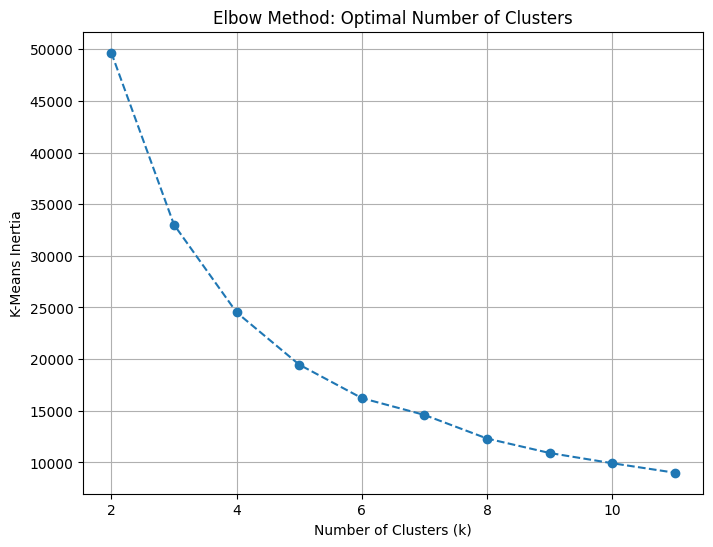

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering for clusters ranging from 2 to 11
inertia = []  # List to store inertia values for each k
k_values = range(2, 12)  # Clusters ranging from 2 to 11

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data_2d)  # Fit K-Means on the PCA-transformed data
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('K-Means Inertia')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.grid()
plt.show()


### Code for K-Means Clustering with the Optimal Number of Clusters

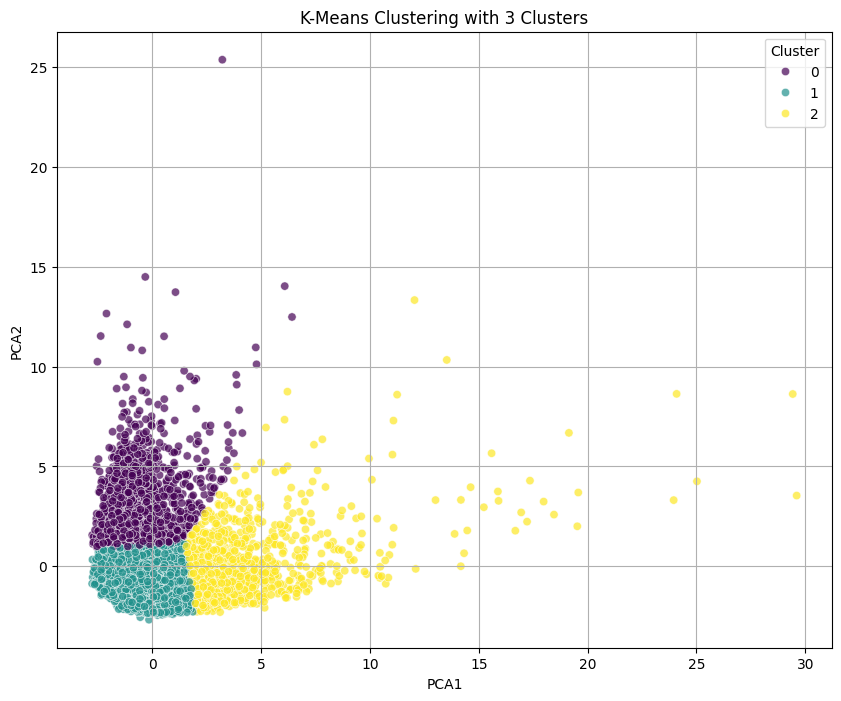

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Set the optimal number of clusters (replace with the value from the Elbow Method)
optimal_k = 3  # Example: Replace with the actual value from the elbow plot

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data_2d)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()